# Data Cleaning y EDA

In [1]:
# Librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

## Arreglos realizados en Excel

 - Se separo el archivo en las columnas correspondientes
 - En las columnas con informacion de tiempos de completitud se modifico los casos en donde figuran horas fraccionarias (1/2 hours) por 0,5.
 - Por otro lado, en las mismas columnas, donde figuraba el tiempo en minutos, se transformo en su equivalente en horas (en formato float)
 - Los campos incompletos (en donde el scrapper no encontro informacion) se modificaron de ***"--"*** a nulos.
 - En los campos sin Rating (NR) se modificaron a nulos.
 - Se eliminaron los juegos con Type "DLC", "Expansion", etc. De esta manera solo con quedamos con jueos completos.


In [2]:
# Importo el archivo con la base de datos
#df = pd.read_excel('C:/Users/Ramiro/Desktop/Digital House/Desafios/HLTB Scrapper/HowLongToBeat DB.xlsx')
df = pd.read_excel('C:/Users/rharari/Desktop/Data Science/HowLongToBeat DB.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48157 entries, 0 to 48156
Data columns (total 15 columns):
Id               48157 non-null int64
Titulo           48157 non-null object
Main Story       15165 non-null float64
Main + Extras    9929 non-null float64
Completionist    11180 non-null float64
All Styles       18386 non-null float64
Rating           19973 non-null float64
Developers       27844 non-null object
Publishers       26637 non-null object
Playable On      16915 non-null object
Genres           27406 non-null object
NA               25709 non-null object
EU               10630 non-null object
JP               4751 non-null object
Updated          48007 non-null object
dtypes: float64(5), int64(1), object(9)
memory usage: 5.5+ MB


In [5]:
#Analizamos como esta compuesto el archivo
df.sample(10)

,Id,Titulo,Main Story,Main + Extras,Completionist,All Styles,Rating,Developers,Publishers,Playable On,Genres,NA,EU,JP,Updated
32819,42133,Golden Yoshi's Island,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Years Ago
37924,48594,Laseronium: The Line,NaN,NaN,2.0,2.0,60.0,NaN,NaN,NaN,NaN,"July 13, 2017",NaN,NaN,1 Year Ago
34395,44204,Hiryu no Ken S: Golden Fighter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Years Ago
24679,30935,Brawl Busters,NaN,NaN,NaN,NaN,NaN,SkeinGlobe,Rock Hippo Productions,NaN,Action,"December 15, 2011",NaN,NaN,1 Month Ago
9334,10696,Tunnel Rats,NaN,NaN,NaN,NaN,NaN,Replay Studios,Boll AG,NaN,"First-Person, Shooter","May 15, 2009",NaN,NaN,2 Years Ago
26876,33751,Water Ski,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Years Ago
24920,31222,Wacky Races: Crash & Dash,NaN,NaN,NaN,NaN,50.0,Eidos Interactive,Eidos Interactive,NaN,Racing,"June 17, 2008",NaN,NaN,6.5 Months Ago
13924,16745,Midnight Nowhere,13.0,NaN,NaN,13.0,50.0,Saturn Plus,Buka Entertainment,PC,"Third-Person, Adventure","March 15, 2004",NaN,NaN,2 Years Ago
5087,5789,Medal of Honor: Underground,12.0,12.5,13.0,12.0,75.0,DreamWorks Interactive,Electronic Arts,"Game Boy Advance, PlayStation","First-Person, Shooter","October 23, 2000","December 01, 2000",NaN,1 Day Ago
34377,44186,Hayazashi Nidan: Morita Shougi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Years Ago


El dataset esta compuesto por 48.157 observaciones con los siguientes campos:
 - __Id__: Id en la web de How Long To Beat
 - __Titulo__: Nombre del videojuego
 - __Main Story__: El tiempo necesario para completar la historia principal
 - __Main Story + Extras__: El tiempo necesario para completar la historia principal y los "sidequests"
 - __Completionist__: El tiempo necesario para completar el juego al 100%
 - __All Styles__: Un tiempo aproximado de los distintos estilos combinados
 - __Rating__: Score otorgado al juego
 - __Developer__: Lista de Desarrolladores
 - __Publishers__: Lista de compañias que publicaron el juego
 - __Playable On__: Consolas en las cuales esta disponible el juego
 - __Genres__: Generos a los cuales pertenece el juego
 - __NA__: Fecha de lanzamiento en Norteamerica
 - __EU__: Fecha de lanzamiento en Europa
 - __JP__: Fecha de lanzamiento en Japon
 - __Updated__: Ultima actualizacion de la informacion del juego

Como era de esperarse, del scrapping inicial hace falta hacer una limpieza para poder dejar listos los datos para el modelado.
Encontramos los siguientes problemas:
 - Las columnas de tiempos queremos redondearlas a dos decimales.
 - Queremos que el indice del df sea el numero de id del juego en la web para poder hacer un rastreo del mismo
 - Queremos separar las columnas de Genres, Playable On, Developers y Publishers en dummies para el modelo
 - Las columnas de Developers, Publishers, Playable On y Genres queremos que esten todas en mayusculas, para que a la hora de separarlos, no haya diferencia entre uppercase o lowercase


In [3]:
#Arreglamos las columnas con ceros extra
df['Main Story'] = df['Main Story'].astype(float).round(2)
df['Main + Extras'] = df['Main + Extras'].astype(float).round(2)
df['Completionist'] = df['Completionist'].astype(float).round(2)
df['All Styles'] = df['All Styles'].astype(float).round(2)

In [4]:
#Pasamos las columnas a UPPER
df['Genres'] = df['Genres'].str.upper()
df['Developers'] = df['Developers'].str.upper()
df['Publishers'] = df['Publishers'].str.upper()
df['Playable On'] = df['Playable On'].str.upper()

In [26]:
devs = df[['Developers','Rating']]
pubs = df[['Publishers','Rating']]

In [27]:
d = devs.groupby(['Developers']).mean()
p = pubs.groupby(['Publishers']).mean()

In [38]:
top100_devs_grouped = pd.DataFrame(d.sort_values('Rating', ascending=False)[0:100].index.values, columns = ['Developers'])
worst100_devs_grouped = pd.DataFrame(d.sort_values('Rating', ascending=True)[0:100].index.values, columns = ['Developers'])
top100_pubs_grouped = pd.DataFrame(p.sort_values('Rating', ascending=False)[0:100].index.values, columns = ['Publishers'])
worst100_pubs_grouped = pd.DataFrame(p.sort_values('Rating', ascending=True)[0:100].index.values, columns = ['Publishers'])

In [9]:
df.head(10)

,Id,Titulo,Main Story,Main + Extras,Completionist,All Styles,Rating,Developers,Publishers,Playable On,Genres,NA,EU,JP,Updated
0,1,688(I) Hunter/Killer,9.5,24.0,50.5,15.5,NaN,SONALYSTS,ELECTRONIC ARTS,PC,SIMULATION,"July 04, 1997",NaN,NaN,1 Month Ago
1,2,Beyond Good & Evil 2,NaN,NaN,NaN,NaN,NaN,UBISOFT MONTPELLIER,UBISOFT,NaN,"ACTION, ADVENTURE",2016,NaN,NaN,3.5 Months Ago
2,10,Ico and Shadow of the Colossus Collection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Years Ago
3,16,Shadow of the Comet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Years Ago
4,18,'Splosion Man,8.0,10.0,18.0,9.5,76.0,TWISTED PIXEL GAMES,MICROSOFT GAMES STUDIOS,XBOX 360,"ACTION, PLATFORMER","July 22, 2009","July 22, 2009",NaN,21.5 Hours Ago
5,19,.hack//G.U. Vol. 1: Rebirth,20.5,26.5,38.0,24.5,80.0,CYBERCONNECT2,BANDAI,"PC, PLAYSTATION 2, PLAYSTATION 4","ACTION, ROLE-PLAYING","October 24, 2006",NaN,"May 18, 2006",20.5 Hours Ago
6,20,.hack//G.U. Vol. 2: Reminisce,22.5,37.0,48.0,31.5,81.0,CYBERCONNECT2,BANDAI,"PLAYSTATION 2, PLAYSTATION 4","ACTION, ROLE-PLAYING","May 08, 2007",NaN,"September 28, 2006",13 Hours Ago
7,21,.hack//G.U. Vol. 3: Redemption,23.5,35.5,52.5,30.0,79.0,CYBERCONNECT2,BANDAI,"PLAYSTATION 2, PLAYSTATION 4","ACTION, ROLE-PLAYING","March 25, 2008",NaN,"January 18, 2007",19.5 Hours Ago
8,22,.hack//Infection,18.0,20.0,28.5,20.5,78.0,CYBERCONNECT2,BANDAI S.A.,PLAYSTATION 2,"ACTION, ROLE-PLAYING","February 11, 2003",NaN,NaN,20 Hours Ago
9,23,.hack//Link,29.0,54.0,NaN,41.5,55.0,CYBERCONNECT2,NAMCO BANDAI GAMES,PSP,ROLE-PLAYING,NaN,NaN,"March 04, 2010",2 Months Ago


## Existe alguna correlacion entre las variables continuas?

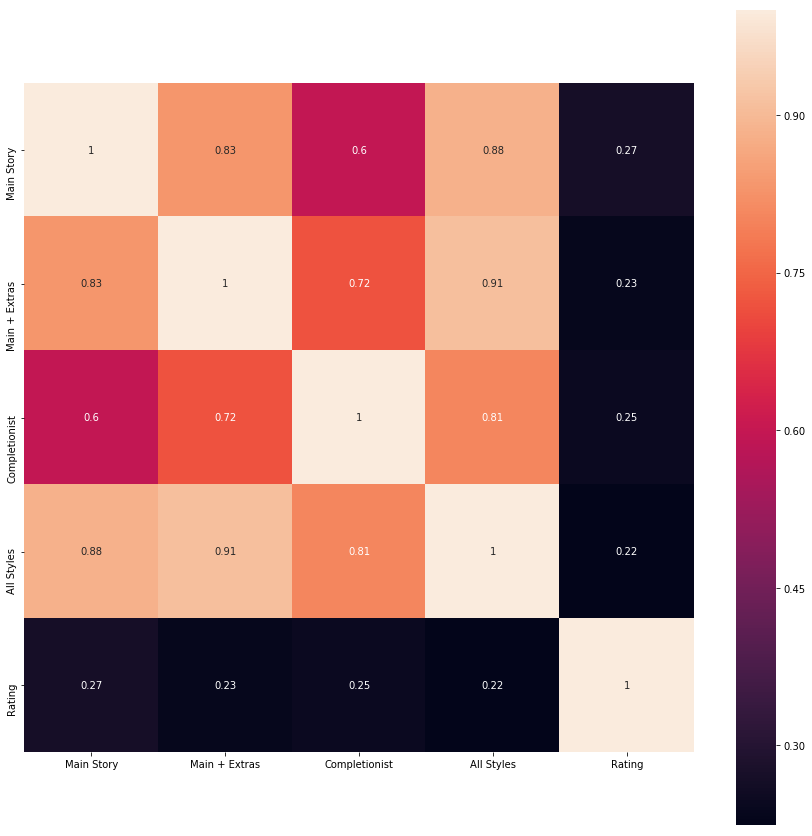

In [12]:
#Graficamos la matriz de correlacion
fig, ax = plt.subplots(figsize=(15,15))       
sns.heatmap(df.drop(columns = 'Id').corr() , square=True, annot=True, ax=ax);

Como puede apreciarse, es logico que haya una fuerte correlacion entre los distintos estilos de "completitud", ya que por lo general uno es dependiente de algun otro (sobre todo "All Styles" que es un promedio del resto).<br>
Lo interesante, es que pareceria que no existiese una fuerte relacion entre el tiempo que dura un juego y su Rating.

# Analicemos algunas estadisticas del dataset

## Como se distribuyen los juegos segun su Rating?

In [24]:
data = [go.Histogram(x=df['Rating'].dropna(), nbinsx= 10)]

layout = go.Layout(
    title='Distribución por Rating',
    xaxis=dict(
        title='Rating'
    ),
    yaxis=dict(
        title='Cantidad'
    ))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic histogram')

## Cuales son los 100 titulos con mejor rating?

In [9]:
top_100 = df.sort_values('Rating', ascending=False)[0:100]

In [26]:
top_100.head()

,Id,Titulo,Main Story,Main + Extras,Completionist,All Styles,Rating,Developers,Publishers,Playable On,Genres,NA,EU,JP,Updated
41218,52455,Psychedelica of the Black Butterfly,7.0,NaN,19.5,13.0,97.0,OTOMATE,AKSYS GAMES,PLAYSTATION VITA,VISUAL NOVEL,"April 27, 2018",NaN,NaN,3 Weeks Ago
10447,12078,Mega Man Unlimited,5.0,5.0,10.5,6.0,97.0,MEGAPHILX,NaN,PC,"ACTION, PLATFORM",NaN,NaN,NaN,6 Months Ago
32263,41422,Umineko,42.0,NaN,80.5,73.0,97.0,07TH EXPANSION,MANGAGAMER,PC,ADVENTURE,"July 08, 2016",NaN,NaN,2 Weeks Ago
9828,11245,Wizball,NaN,NaN,8.0,8.0,97.0,SENSIBLE SOFTWARE,OCEAN SOFTWARE,COMMODORE 64,SHOOT 'EM UP,1987,NaN,NaN,4.5 Days Ago
2361,2646,DJMax Technika Tune,5.0,8.5,95.0,19.0,97.0,"PENTAVISION, NEOWIZ MOBILE",PENTAVISION,PLAYSTATION VITA,MUSIC/RHYTHM,"December 04, 2012",NaN,"September 27, 2012",3.5 Months Ago


### Como se distribuyen segun el largo de los mismos (sobre la variable Main Story)

In [37]:
data = [go.Histogram(x=top_100['Main Story'].dropna(), nbinsx= 10)]

layout = go.Layout(
    title='100 Mejores Juegos',
    xaxis=dict(
        title='Main Story (hs)'
    ),
    yaxis=dict(
        title='Cantidad'
    ))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic histogram')

## Cuales son los 100 peores titulos?

In [10]:
#Me quedo con los que tienen Main Story completo
worst_100 = df.dropna(subset=['Main Story'])
worst_100 = worst_100.sort_values('Rating', ascending=True)[0:100]

In [47]:
worst_100.head()

,Id,Titulo,Main Story,Main + Extras,Completionist,All Styles,Rating,Developers,Publishers,Playable On,Genres,NA,EU,JP,Updated
31711,40686,Fantastic Checkers 2,0.25,NaN,1.0,0.63,10.0,ENSENASOFT,ENSENASOFT,PC,BOARD GAME,"August 19, 2016",NaN,NaN,1 Week Ago
25660,32139,Shrek: Swamp Kart Speedway,0.68,NaN,NaN,0.68,10.0,NaN,TDK,NaN,NaN,2002,NaN,NaN,7 Months Ago
19084,23311,Spartans Vs Zombies Defense,4.00,NaN,NaN,4.00,10.0,YFC GAMES,YFC GAMES,PC,"ACTION, STRATEGY","January 06, 2015","January 06, 2015",NaN,4.5 Months Ago
4039,4588,Ibara,2.50,14.0,NaN,7.00,10.0,CAVE,"AMI, TAITO CORPORATION",PLAYSTATION 2,"SCROLLING, SHOOTER",NaN,NaN,"July 15, 2005",6 Days Ago
8490,9700,Terminator 3: War of the Machines,3.00,NaN,7.0,5.00,10.0,CLEVER'S GAMES,ATARI,PC,"FIRST-PERSON, SHOOTER","December 02, 2003","November 28, 2003","April 12, 2004",8 Months Ago


### Como se distribuyen segun el largo de los mismos (sobre la variable Main Story)

In [44]:
data = [go.Histogram(x=worst_100['Main Story'].dropna(), nbinsx= 10)]

layout = go.Layout(
    title='100 Peores Juegos',
    xaxis=dict(
        title='Main Story (hs)'
    ),
    yaxis=dict(
        title='Cantidad'
    ))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic histogram')

Como se puede ver, los resultados reflejan lo que habiamos visto anteriormente en la matriz de correlacion, si bien pareceria que los juegos con mayor Rating en lineas generales tienen una duracion mayor que los juegos con peor Rating.

# Modelado

El objetivo de este trabajo es poder crear un modelo predictivo, que a partir de la informacion de un juego, como su Developer, Publisher, Genero, etc; pueda determinar un rating entre 0 y 100.<br>
Nos interesa especialmente que el modelo pueda acomodarse a valores faltantes en algunos de los campos, para lo cual vamos a utilizar XGBoost.<br>
Al mismo tiempo, vamos a plantear otro modelos de regresion para datasets completos y comparar la performance de ambos.

Para poder proveerle la data al modelo, necesitamos que las columnas que tienen mas de un valor (como Genres) sean transformadas en dummies. <br>
Para eso vamos a definir una funcion que itere sobre las columnas correspondientes, y extraiga todos los valores unicos, para luego crear una columna por cada uno de esos valores y completarla con 1 o 0 dependiendo si pertenece a esa clase o no.

## Defino una funcion para separar los atributos multiclase

In [30]:
def splitter(dataframe_atributos, columna, dataframe_mapeo):
    #Import de itertools para chainear los valores
    import itertools
    #Genero lista con los valores unicos y lista vacia para ir llenando
    valores_unicos = dataframe_atributos[columna].unique()
    valores_individuales = []
    for x in valores_unicos:
        if type(x) == str:
            valores_individuales.append(x.split(','))
        else:
            pass
    valores_individuales = list(itertools.chain.from_iterable(valores_individuales))
    
    #Elimino los espacios al principio y me quedo con los valores unicos
    atributo = []
    for i in range(len(valores_individuales)):
        att = valores_individuales[i].lstrip()
        atributo.append(att)
    valores_individuales = set(atributo)
    
    #Genero un diccionario con llave cada valor unico, y valor la lista de unos y ceros
    diccionario = {}

    for z in valores_individuales:
        lista = []
        for y in range(len(dataframe_mapeo)):
            try:
                if dataframe_mapeo[columna][y].find(z) != -1:
                    lista.append(1)
                else:
                    lista.append(0)
            except:
                lista.append(0)
        diccionario[z] = lista
    return diccionario

### Generos y Playable On

In [31]:
%%time
#Utilizo la funcion para generar un diccionario con los generos, y sus valores segun cada fila del df original
dict_generos = splitter(df,'Genres',df)

#Utilizo la funcion para generar un diccionario con las consolas, y sus valores segun cada fila del df original
dict_consolas = splitter(df,'Playable On',df)

Wall time: 4min 19s


In [32]:
#Transformo esos diccionarios en dataframes para despues appendarlos al df original

df_consolas = pd.DataFrame(dict_consolas)
df_generos = pd.DataFrame(dict_generos)

df_consolas = df_consolas.drop(columns = '') #Esta columna se genero demas al momento de correr la funcion splitter

#Genero prefijo para las columnas
df_consolas = df_consolas.add_prefix('console_')
df_generos = df_generos.add_prefix('gen_')

In [68]:
df_consolas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48157 entries, 0 to 48156
Data columns (total 70 columns):
3DO                        48157 non-null int64
AMIGA                      48157 non-null int64
AMSTRAD CPC                48157 non-null int64
ANDROID                    48157 non-null int64
APPLE II                   48157 non-null int64
ARCADE                     48157 non-null int64
ATARI 2600                 48157 non-null int64
ATARI 5200                 48157 non-null int64
ATARI 7800                 48157 non-null int64
ATARI JAGUAR               48157 non-null int64
ATARI LYNX                 48157 non-null int64
ATARI ST                   48157 non-null int64
BROWSER                    48157 non-null int64
COMMODORE 64               48157 non-null int64
DREAMCAST                  48157 non-null int64
FM TOWNS                   48157 non-null int64
GAME BOY                   48157 non-null int64
GAME BOY ADVANCE           48157 non-null int64
GAME BOY COLOR             

In [67]:
df_generos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48157 entries, 0 to 48156
Columns: 354 entries, 2.5D PLATFORM GAME to WRESTLING
dtypes: int64(354)
memory usage: 130.1 MB


### Developers y Publishers

Al tener una lista tan larga de valores unicos en cada una de estas columnas (alrededor de 14.000), para no estirar demasiado horizontalmente el dataframe que vamos a utilizar para modelar, solo vamos a tomar los Developers y Publishers de los 100 mejores y los 100 peores juegos que clasificamos anteriormente.

Para obtener esos valores unicos y mapearlos al dataframe original, vamos a tener que utilizar la funcion splitter, pero cuidando de identificar correctamente cada uno de los dataframes que toman parte de la funcion

## Prueba con order by

In [11]:
%%time
#Utilizo la funcion para generar un diccionario con los Publishers, y sus valores segun cada fila del df original
dict_top_publishers = splitter(top_100,'Publishers',df)
dict_worst_publishers = splitter(worst_100,'Publishers',df)

#Utilizo la funcion para generar un diccionario con los Developers, y sus valores segun cada fila del df original
dict_top_developers = splitter(top_100,'Developers',df)
dict_worst_developers = splitter(worst_100,'Developers',df)

Wall time: 2min 28s


## Prueba con group by

In [39]:
%%time
#Utilizo la funcion para generar un diccionario con los Publishers, y sus valores segun cada fila del df original
dict_top_publishers = splitter(top100_pubs_grouped,'Publishers',df)
dict_worst_publishers = splitter(worst100_pubs_grouped,'Publishers',df)

#Utilizo la funcion para generar un diccionario con los Developers, y sus valores segun cada fila del df original
dict_top_developers = splitter(top100_devs_grouped,'Developers',df)
dict_worst_developers = splitter(worst100_devs_grouped,'Developers',df)

Wall time: 4min 49s


In [40]:
# Genero un dataframe para cada uno de los diccionarios
df1_pub = pd.DataFrame(dict_top_publishers)
df2_pub = pd.DataFrame(dict_worst_publishers)
df1_dev = pd.DataFrame(dict_top_developers)
df2_dev = pd.DataFrame(dict_worst_developers)

In [41]:
# Armo una lista con los Publishers que figuran en ambos df
cols_a_eliminar_pub = []
for col1 in df1_pub.columns:
    for col2 in df2_pub.columns:
        if col1 == col2:
            cols_a_eliminar_pub.append(col2)
        else:
            pass
        
        
# Armo una lista con los Developers que figuran en ambos df
cols_a_eliminar_dev = []
for col1 in df1_dev.columns:
    for col2 in df2_dev.columns:
        if col1 == col2:
            cols_a_eliminar_dev.append(col2)
        else:
            pass

In [42]:
#Combino ambos dataframes, quedandome con las columnas unicas
df_developers = pd.concat([df1_dev,df2_dev.drop(columns = cols_a_eliminar_dev)], axis = 1)
df_publishers = pd.concat([df1_pub,df2_pub.drop(columns = cols_a_eliminar_pub)], axis = 1)

Ya que hay Publishers que tambien son Developers, vamos a agregarle un prefijo a las columnas de cada Dataframe

In [43]:
#Le agrego un prefijo a las columnas
df_publishers = df_publishers.add_prefix('pub_')
df_developers = df_developers.add_prefix('dev_')

In [44]:
# Junto todo
df_copia = df

df = df.drop(['Developers','Publishers','Playable On','Genres','NA','EU','JP','Updated'], axis = 1)

df = pd.concat([df, df_consolas, df_generos, df_developers, df_publishers], axis = 1)

In [43]:
#Seteamos el indice 
df = df.set_index(df['Id'])
df = df.drop(columns='Id')

## XGBoost

In [45]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error

In [46]:
#Seteamos el indice 
df = df.set_index(df['Id'])
df = df.drop(columns='Id')

In [47]:
#Elimino las observaciones que no tienen completa la variable objetivo
df = df.dropna(subset = ['Rating'])

In [48]:
#Separo la matriz de features y la variable objetivo
X =  df.drop(['Titulo','Rating'], axis = 1)
y = df['Rating']

In [49]:
#Separo en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [50]:
#Instancio el Clasificador de XGBoost
xg_reg = xgb.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, objective='reg:linear',\
                           booster='gbtree', n_jobs=-1)

In [51]:
%%time
#Fiteo el modelo
xg_reg.fit(X_train,y_train)

#Predicciones
preds = xg_reg.predict(X_test)

Wall time: 23.5 s


In [52]:
#Score
xg_reg.score(X_test, y_test)

0.19829676777758645

### Como podemos mejorar el score?

# XGBoost + GridSearch

In [81]:
# Definimos una lista de hiperparametros a tunear
l2_reg_range = [3,5,7,10]
profundidad = [2,4,6,8,10]
learn_rate = [0.01,0.03,0.1]

In [82]:
#Generamos la grilla para GridSearch
param_grid = dict(reg_lambda = l2_reg_range, max_depth=profundidad, learning_rate = learn_rate)
print(param_grid)

{'reg_lambda': [3, 5, 7, 10], 'max_depth': [2, 4, 6, 8, 10], 'learning_rate': [0.01, 0.03, 0.1]}


In [ ]:
%%time
# Instanciamos el modelo de XGBoost con los parametros de GridSearch y un cross validation de 5 folds
xgb_regressor = xgb.XGBRegressor(n_estimators=100, silent=True, objective='reg:linear',booster='gbtree', n_jobs=-1)
xgb_gs = GridSearchCV(xgb_regressor, param_grid, cv = 5)
xgb_gs.fit(X_train, y_train)

In [50]:
#Vemos los parametros del mejor modelo
xgb_gs.best_estimator_, xgb_gs.best_score_, xgb_gs.best_params_

(XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
        max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
        n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
        reg_alpha=0, reg_lambda=10, scale_pos_weight=1, seed=None,
        silent=True, subsample=1),
 0.20413076439456873,
 {'learning_rate': 0.1, 'max_depth': 6, 'reg_lambda': 10})

## Utilizamos el mejor modelo para entrenar

In [51]:
xgb_best = xgb.XGBRegressor(n_estimators=100, silent=True, objective='reg:linear',booster='gbtree', n_jobs=-1, \
                           learning_rate = 0.1, max_depth=6,reg_lambda=10)
xgb_best.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=10, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [53]:
xgb_best.score(X_test, y_test)

0.20613014421766385

## CatBoost

In [36]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [41]:
#Separo la matriz de features y la variable objetivo
X_cb =  df.drop(['Titulo','Rating','Developers','Publishers','NA','EU','JP','Updated'], axis = 1)
y_cb = df['Rating'].astype(int)

In [43]:
#Separo en Train y Test
X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(X_cb, y_cb, test_size=0.25, random_state=1)

In [44]:
cb_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=3, l2_leaf_reg=7, loss_function='RMSE')

In [45]:
cb_model.fit(X_train_cb, y_train_cb)

0:	learn: 59.5222746	total: 16.1ms	remaining: 1.59s
1:	learn: 54.1467145	total: 28.4ms	remaining: 1.39s
2:	learn: 49.3646450	total: 41.8ms	remaining: 1.35s
3:	learn: 45.1198757	total: 53.8ms	remaining: 1.29s
4:	learn: 41.3022939	total: 67.9ms	remaining: 1.29s
5:	learn: 37.9101091	total: 82.4ms	remaining: 1.29s
6:	learn: 34.9292373	total: 95ms	remaining: 1.26s
7:	learn: 32.3601524	total: 107ms	remaining: 1.23s
8:	learn: 30.0935479	total: 119ms	remaining: 1.21s
9:	learn: 28.0583158	total: 134ms	remaining: 1.2s
10:	learn: 26.3177230	total: 147ms	remaining: 1.19s
11:	learn: 24.7952239	total: 163ms	remaining: 1.2s
12:	learn: 23.5436691	total: 175ms	remaining: 1.17s
13:	learn: 22.4059498	total: 188ms	remaining: 1.16s
14:	learn: 21.4457824	total: 201ms	remaining: 1.14s
15:	learn: 20.6217964	total: 217ms	remaining: 1.14s
16:	learn: 19.9150810	total: 234ms	remaining: 1.14s
17:	learn: 19.3365551	total: 249ms	remaining: 1.13s
18:	learn: 18.8524540	total: 263ms	remaining: 1.12s
19:	learn: 18.44848

In [46]:
#Predecimos sobre el set de testeo
cb_preds = cb_model.predict(X_test_cb, y_test_cb)

TypeError: cannot convert the series to <class 'int'>

### Generos

# ESTA ES LA QUE FUNCA 

In [93]:
#Lista de Generos
import itertools
unique_genres = df['Genres'].unique()
individual_genres = []
for genre in unique_genres:
    if type(genre) == str:
        individual_genres.append(genre.split(','))
    else:
        pass

individual_genres = list(itertools.chain.from_iterable(individual_genres))

#Elimino los espacios al principio y me quedo con los unicos
generos = []
for i in range(len(individual_genres)):
    gen = individual_genres[i].lstrip()
    generos.append(gen)
individual_genres = set(generos)

%%time
#Tengo que loopear sobre individual_genres, generar una columna para cada genero y appendar un 1 o 0 
#si la columna del df tiene ese dato
dict_generos = {}

for genre in individual_genres:
    lista = []
    for i in range(len(df)):
        try:
            if df['Genres'][i].find(genre) != -1:
                lista.append(1)
            else:
                lista.append(0)
        except:
            lista.append(0)
    dict_generos[genre] = lista

# HAY QUE LEVANTAR EXCEPCION PARA LOS NULL

In [80]:
#Lista de Generos
import itertools
unique_genres = df['Genres'].unique()
individual_genres = []
for genre in unique_genres:
    if type(genre) == str:
        individual_genres.append(genre.split(','))
    else:
        pass

individual_genres = list(itertools.chain.from_iterable(individual_genres))
individual_genres = set(individual_genres)